In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow as pa
import os
import seaborn as sns

In [4]:
# Cargar los datos desde los archivos CSV
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

# Mostrar la cantidad de columnas y la información de cada DataFrame
dataframes = {
    'Chile': chile_df,
    'Argentina': argentina_df,
    'Antártica': antartica_df
}

for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(f"Número de columnas: {len(df.columns)}")
    print("Información de las columnas:")
    print(df.info(5))
    print("\n")


DataFrame: Chile
Número de columnas: 146
Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no   

In [5]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'accepted_rank',
    'early_interval',
    'late_interval',
    'max_ma',
    'min_ma',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'geogscale',
    'regionalsection',
    'life_habit'
]

df_chile_new = chile_df[columns].copy()
df_argentina_new = argentina_df[columns].copy()
df_antartica_new = antartica_df[columns].copy()

In [6]:
df_chile_new

species_name  occurrence_no            accepted_name accepted_rank  \
0       ceciliana          16417               Leionucula         genus   
1      amuriensis          16418                 Nuculana         genus   
2     cuneiformis          16419                 Nuculana         genus   
3     levitestata          16420                   Yoldia         genus   
4         pencana          16421                Neiloides         genus   
...           ...            ...                      ...           ...   
9476          sp.        1659402                   Ostrea         genus   
9477   antarctica        1659403     Cucullaea antarctica       species   
9478          sp.        1659404                   Nucula         genus   
9479   saladensis        1660104  Micrauchenia saladensis       species   
9480       indet.        1662256             Tracheophyta   superphylum   

           early_interval late_interval  max_ma  min_ma        phylum  \
0           Maastrichtian           NaN   72.10  66.000      Mollusca   
1           Maastrichtian           NaN   72.10  66.000      Mollusca   
2           Maastrichtian           NaN   72.10  66.000      Mollusca   
3           Maastrichtian           NaN   72.10  66.000      Mollusca   
4           Maastrichtian           NaN   72.10  66.000      Mollusca   
...                   ...           ...     ...     ...           ...   
9476             Turonian     Campanian   93.90  72.100      Mollusca   
9477             Turonian     Campanian   93.90  72.100      Mollusca   
9478             Turonian     Campanian   93.90  72.100      Mollusca   
9479            Tortonian     Messinian   11.63   5.333      Chordata   
9480  Early Maastrichtian           NaN   72.10  66.000  Tracheophyta   

         class             order               family         genus  \
0     Bivalvia          Nuculida            Nuculidae    Leionucula   
1     Bivalvia        Nuculanida          Nuculanidae      Nuculana   
2     Bivalvia        Nuculanida          Nuculanidae      Nuculana   
3     Bivalvia        Nuculanida            Yoldiidae        Yoldia   
4     Bivalvia          Nuculida  NO_FAMILY_SPECIFIED     Neiloides   
...        ...               ...                  ...           ...   
9476  Bivalvia          Ostreida            Ostreidae        Ostrea   
9477  Bivalvia            Arcida         Cucullaeidae     Cucullaea   
9478  Bivalvia          Nuculida            Nuculidae        Nucula   
9479  Mammalia  Panameriungulata      Macraucheniidae  Micrauchenia   
9480       NaN               NaN                  NaN           NaN   

            lat        lng                               diet geogscale  \
0    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
1    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
2    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
3    -37.000000 -73.000000                     deposit feeder     basin   
4    -37.000000 -73.000000                     deposit feeder     basin   
...         ...        ...                                ...       ...   
9476 -50.884998 -72.625000                  suspension feeder       NaN   
9477 -50.884998 -72.625000                  suspension feeder       NaN   
9478 -50.884998 -72.625000  deposit feeder, suspension feeder       NaN   
9479 -27.684723 -70.949997                          herbivore       NaN   
9480 -50.711666 -72.541389                                NaN   outcrop   

      regionalsection  life_habit  
0                 NaN    infaunal  
1                 NaN    infaunal  
2                 NaN    infaunal  
3                 NaN    infaunal  
4                 NaN    infaunal  
...               ...         ...  
9476              NaN   epifaunal  
9477              NaN    infaunal  
9478              NaN    infaunal  
9479              NaN  scansorial  
9480              NaN         NaN  

[9481 rows x 19 columns]

In [10]:
# Inicializar un diccionario para almacenar el conteo de NaNs
nan_counts = {}

# Contar NaN en cada columna usando un bucle for
for column in df_chile_new.columns:
    nan_count = df_chile_new[column].isna().sum()
    nan_counts[column] = nan_count

# Mostrar el número de NaN por columna
print("Número de NaN por columna:")
for column, count in nan_counts.items():
    print(f"{column}: {count}")


Número de NaN por columna:
species_name: 0
occurrence_no: 0
accepted_name: 138
accepted_rank: 138
early_interval: 0
late_interval: 7876
max_ma: 0
min_ma: 0
phylum: 144
class: 189
order: 358
family: 567
genus: 907
lat: 0
lng: 0
diet: 732
geogscale: 3055
regionalsection: 9481
life_habit: 738


In [7]:
df_chile_new['accepted_name'].fillna('Desconocido', inplace=True)

C:\Users\vicen\AppData\Local\Temp\ipykernel_23376\3795711843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_chile_new['accepted_name'].fillna('Desconocido', inplace=True)


In [8]:
df_chile_new = df_chile_new.drop(columns=['regionalsection'])

In [199]:
# Filtrar para eliminar filas con NaNs
top_10_families = df_chile_new['family'].value_counts().head(15)
# Visualización de las 10 familias más comunes
plt.figure(figsize=(10, 6))
top_10_families.plot(kind='bar', color='skyblue')
plt.title('Top 10 Familias más Comunes')
plt.xlabel('Familia')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

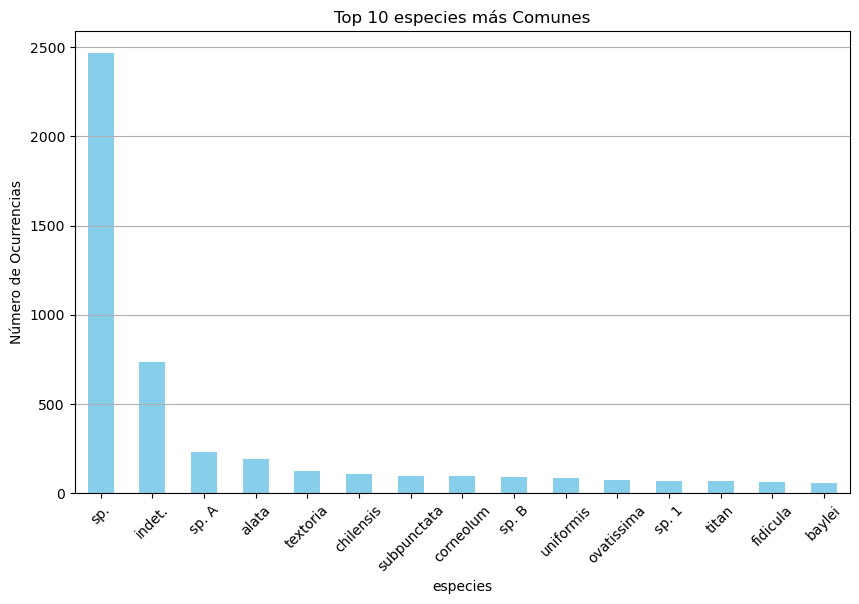

In [201]:
# Filtrar para eliminar filas con NaNs
top_10_families = df_chile_new['species_name'].value_counts().head(15)
# Visualización de las 10 familias más comunes
plt.figure(figsize=(10, 6))
top_10_families.plot(kind='bar', color='skyblue')
plt.title('Top 10 especies más Comunes')
plt.xlabel('especies')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [16]:
# Contar cuántas veces aparece 'indet' en la columna 'species_name'
indet_count = df_chile_new['species_name'].str.contains('indet.', case=False, na=False).sum()

print(f"Número de 'indet' en 'species_name': {indet_count}")

Número de 'indet' en 'species_name': 759


In [205]:
# Filtrar para eliminar filas con NaNs
top_10_families = df_chile_new['accepted_name'].value_counts().head(10)
# Visualización de las 10 familias más comunes
plt.figure(figsize=(10, 6))
top_10_families.plot(kind='bar', color='skyblue')
plt.title('Top 10 especies más Comunes')
plt.xlabel('especies')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

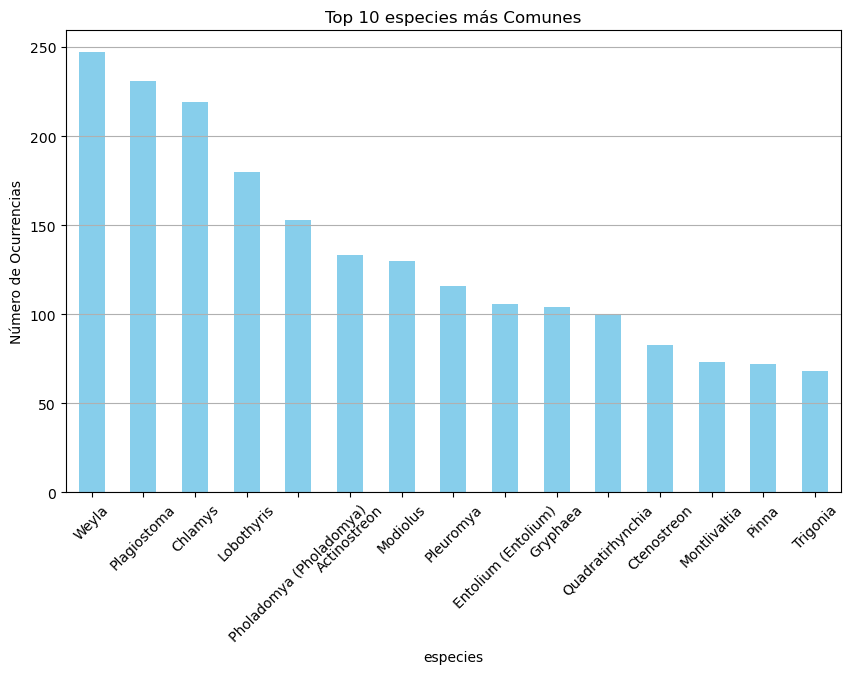

In [207]:
# Filtrar para eliminar filas con NaNs
top_10_families = df_chile_new['genus'].value_counts().head(15)
# Visualización de las 10 familias más comunes
plt.figure(figsize=(10, 6))
top_10_families.plot(kind='bar', color='skyblue')
plt.title('Top 10 especies más Comunes')
plt.xlabel('especies')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [209]:
# Visualizar la distribución de 'occurrence_no'
plt.figure(figsize=(10, 6))
plt.hist(df_chile_new['occurrence_no'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de occurrence_no')
plt.xlabel('Occurrence Number')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [211]:
# Filtrar el DataFrame para encontrar el registro con occurrence_no igual a 16417
specific_record = df_chile_new[df_chile_new['occurrence_no'] == 16417]

# Mostrar el registro encontrado
print("Registro con occurrence_no 16417:")
print(specific_record)

Registro con occurrence_no 16417:
  species_name  occurrence_no accepted_name accepted_rank early_interval  \
0    ceciliana          16417    Leionucula         genus  Maastrichtian   

  late_interval  max_ma  min_ma    phylum     class     order     family  \
0           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculida  Nuculidae   

        genus   lat   lng                               diet geogscale  \
0  Leionucula -37.0 -73.0  deposit feeder, suspension feeder     basin   

  life_habit  
0   infaunal  


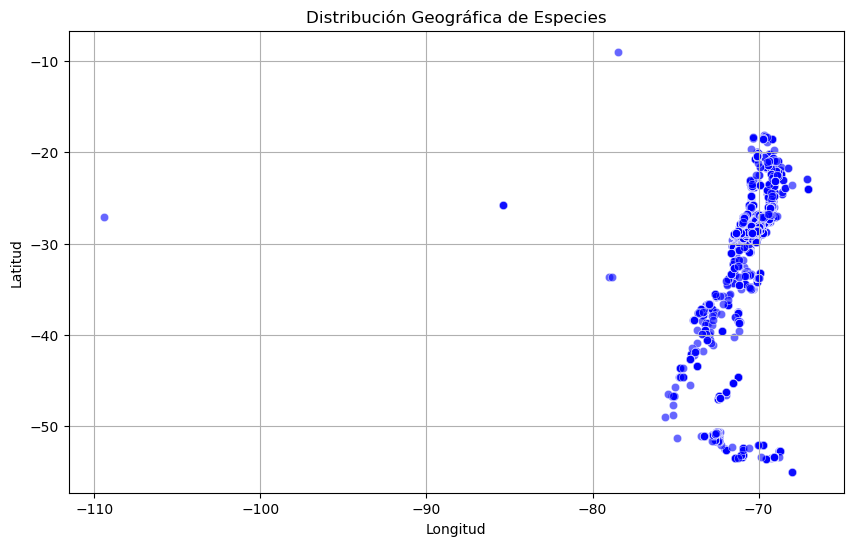

In [213]:
# Gráfico de Dispersión de 'lat' vs 'lng'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_chile_new, x='lng', y='lat', alpha=0.6, color='blue')
plt.title('Distribución Geográfica de Especies')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()
plt.show()

In [215]:
# Gráfico de Dispersión de 'lat' vs 'lng'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_artantica_new, x='lng', y='lat', alpha=0.6, color='blue')
plt.title('Distribución Geográfica de Especies')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()
plt.show()

NameError: name 'df_artantica_new' is not defined

<Figure size 1000x600 with 0 Axes>

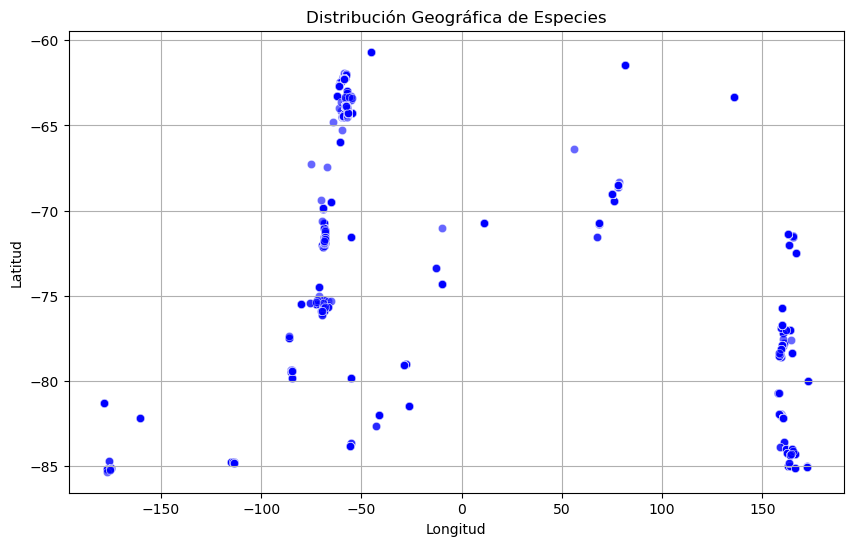

In [217]:
# Gráfico de Dispersión de 'lat' vs 'lng'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_antartica_new, x='lng', y='lat', alpha=0.6, color='blue')
plt.title('Distribución Geográfica de Especies')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()
plt.show()

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Graficar los puntos
ax.scatter(df_chile_new['lng'], df_chile_new['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en el Mapa del Mundo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [220]:


# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Graficar los puntos
ax.scatter(df_argentina_new['lng'], df_argentina_new['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en Argentina')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [223]:
lowest_latitudes = df_chile_new.nsmallest(5, 'lng')

# Mostrar las 5 menores latitudes
print("Las 5 menores longitudes en Chile:")
print(lowest_latitudes[['lat', 'lng', 'species_name']])  # Ajusta las columnas según sea necesario

Las 5 menores longitudes en Chile:
            lat         lng species_name
6822 -27.139908 -109.427330       indet.
5899 -25.733334  -85.416664          sp.
5900 -25.733334  -85.416664          sp.
5901 -25.733334  -85.416664          sp.
5493 -33.666668  -79.000000         type


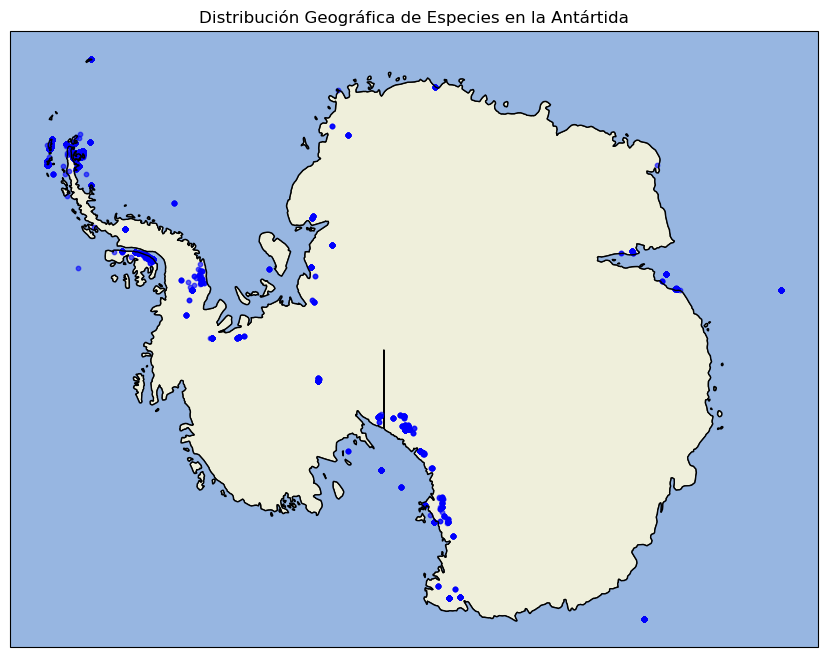

In [225]:
# Crear un mapa de la Antártida
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Graficar los puntos
ax.scatter(df_antartica_new['lng'], df_antartica_new['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en la Antártida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


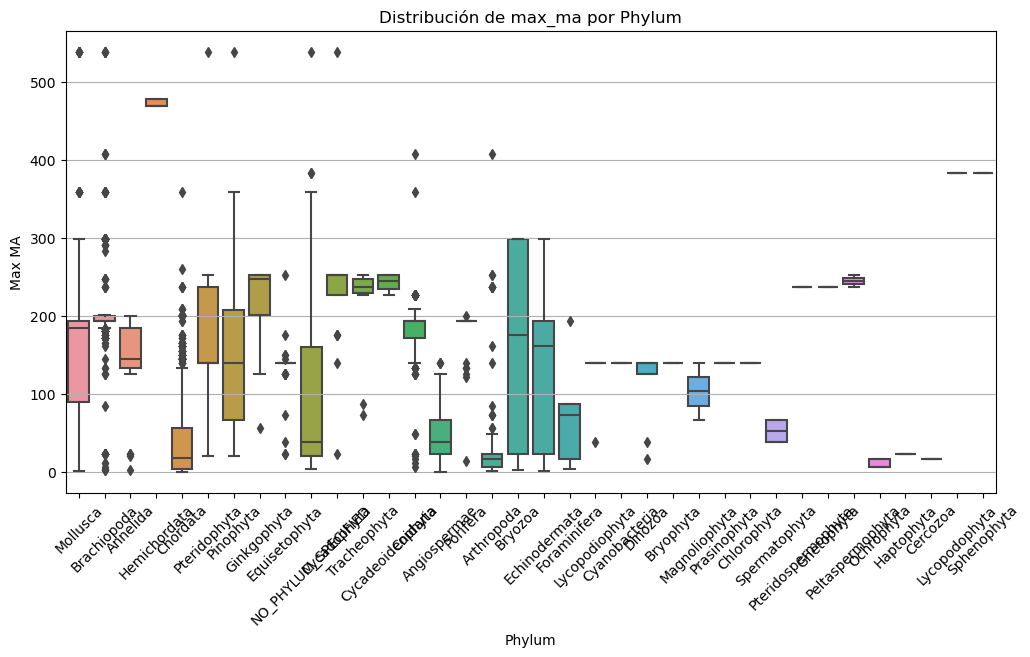

In [226]:
# Gráfico de Cajas de max_ma por phylum
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_chile_new, x='phylum', y='max_ma')
plt.xticks(rotation=45)
plt.title('Distribución de max_ma por Phylum')
plt.xlabel('Phylum')
plt.ylabel('Max MA')
plt.grid(axis='y')
plt.show()

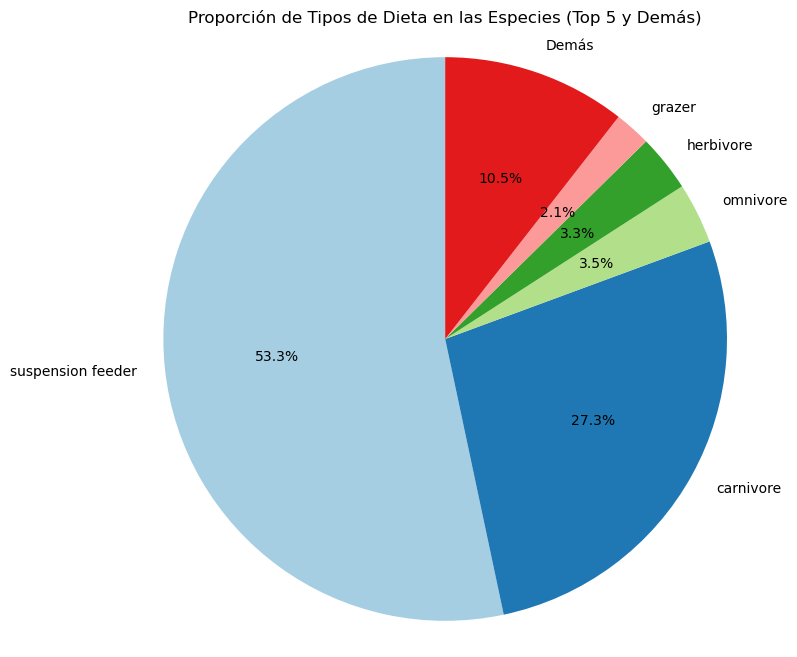

In [227]:
# Contar la frecuencia de cada tipo de dieta
diet_counts = df_chile_new['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(top_5_diets, labels=top_5_diets.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proporción de Tipos de Dieta en las Especies (Top 5 y Demás)')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

In [228]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Graficar los puntos
# Puedes ajustar el tamaño 's' en función de una columna, por ejemplo 'occurrence_no'
# Asegúrate de que 'occurrence_no' esté en df_chile_new
ax.scatter(df_chile_new['lng'], df_chile_new['lat'], color='blue', alpha=0.6, 
           s=df_chile_new['occurrence_no']*10,  # Ajusta el tamaño de los puntos
           transform=ccrs.PlateCarree())

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en el Mapa del Mundo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Opcional: Guardar el gráfico
plt.savefig('distribucion_geografica_especies.png', bbox_inches='tight')

plt.show()

In [233]:
# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las dietas
dietas_unicas = df_chile_new['diet'].unique()
colores = plt.cm.get_cmap('Set1', len(dietas_unicas))  # Usar una paleta de colores

# Crear un diccionario para mapear cada dieta a un color
color_dict = {dieta: colores(i) for i, dieta in enumerate(dietas_unicas)}

# Graficar los puntos con colores según la dieta
for dieta, grupo in df_chile_new.groupby('diet'):
    ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
               s=10, transform=ccrs.PlateCarree(), label=dieta)

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies por Dieta')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\1411321489.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(dietas_unicas))  # Usar una paleta de colores


C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\4078654091.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_diets))  # Usar una paleta de colores


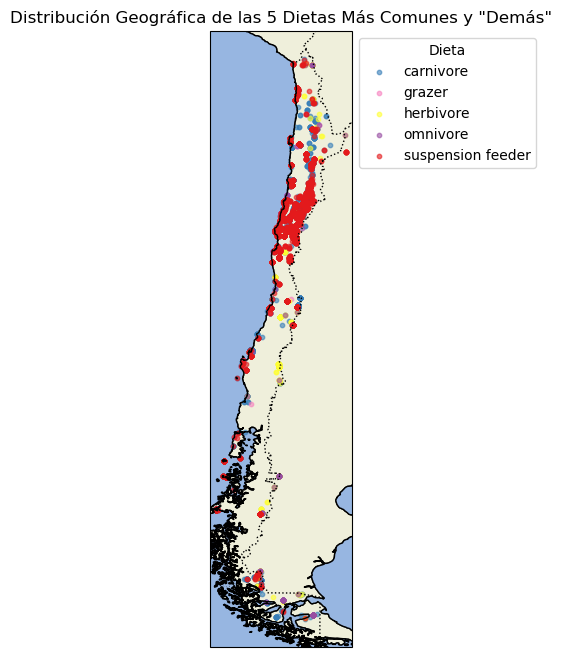

In [234]:
# Contar la frecuencia de cada tipo de dieta
diet_counts = df_chile_new['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Filtrar el DataFrame para incluir solo las dietas seleccionadas
df_filtered = df_chile_new[df_chile_new['diet'].isin(top_5_diets.index)]

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las dietas
colores = plt.cm.get_cmap('Set1', len(top_5_diets))  # Usar una paleta de colores

# Crear un diccionario para mapear cada dieta a un color
color_dict = {dieta: colores(i) for i, dieta in enumerate(top_5_diets.index)}

# Graficar los puntos con colores según la dieta
for dieta, grupo in df_filtered.groupby('diet'):
    ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
               s=10, transform=ccrs.PlateCarree(), label=dieta)

# Títulos y etiquetas
plt.title('Distribución Geográfica de las 5 Dietas Más Comunes y "Demás"')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

La siguiente es un mapa con colores por dieta en chile

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\397273802.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5


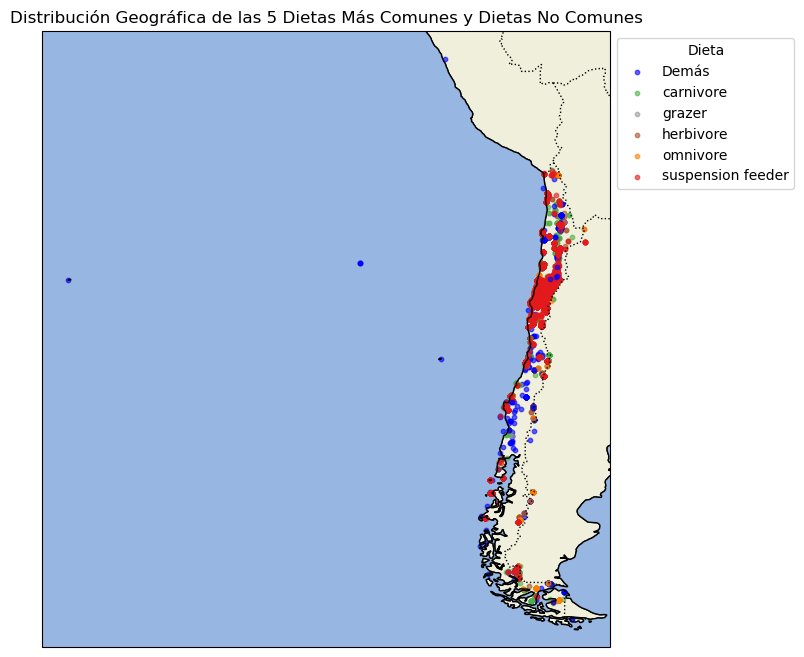

In [236]:
# Contar la frecuencia de cada tipo de dieta
diet_counts = df_chile_new['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las dietas
colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5
color_dict = {dieta: colores(i) for i, dieta in enumerate(top_5_diets.index[:-1])}  # Excluye 'Demás'
color_dict['Demás'] = 'green'  # Color verde para la categoría "Demás"

# Graficar los puntos con colores según la dieta
for dieta, grupo in df_chile_new.groupby('diet'):
    if dieta in top_5_diets.index:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label=dieta)
    else:  # Para las dietas no comunes
        ax.scatter(grupo['lng'], grupo['lat'], color='blue', alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label='Demás' if 'Demás' not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title('Distribución Geográfica de las 5 Dietas Más Comunes y Dietas No Comunes')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\1569044501.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_families) - 1)  # Paleta para las top 5


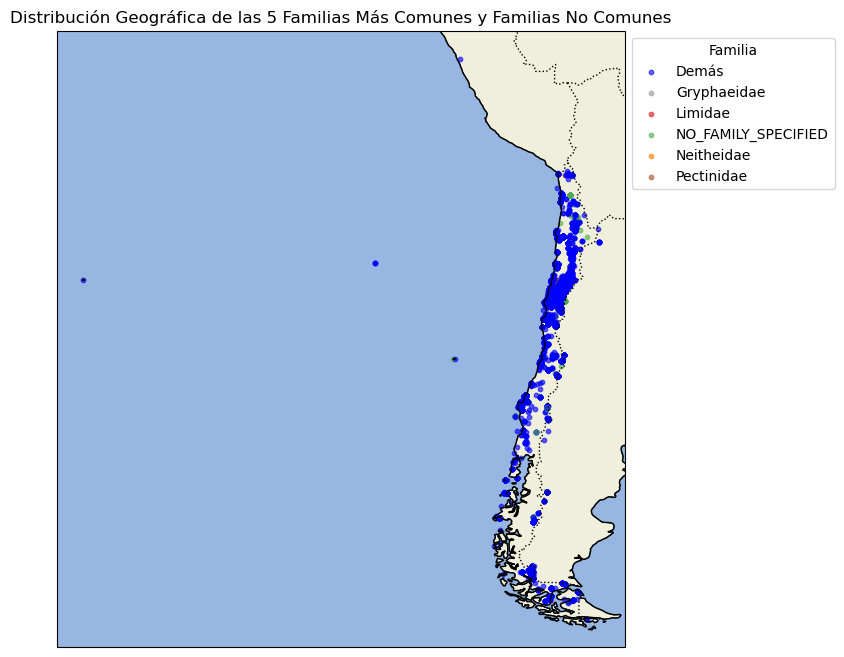

In [237]:
# Contar la frecuencia de cada tipo de familia
family_counts = df_chile_new['family'].value_counts()

# Seleccionar las 5 familias más comunes
top_5_families = family_counts.head(5)

# Sumar las familias restantes en una categoría "Demás"
other_families_count = family_counts[5:].sum()
top_5_families['Demás'] = other_families_count

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las familias
colores = plt.cm.get_cmap('Set1', len(top_5_families) - 1)  # Paleta para las top 5
color_dict = {family: colores(i) for i, family in enumerate(top_5_families.index[:-1])}  # Excluye 'Demás'
color_dict['Demás'] = 'green'  # Color verde para la categoría "Demás"

# Graficar los puntos con colores según la familia
for family, grupo in df_chile_new.groupby('family'):
    if family in top_5_families.index:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[family], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label=family)
    else:  # Para las familias no comunes
        ax.scatter(grupo['lng'], grupo['lat'], color='blue', alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label='Demás' if 'Demás' not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title('Distribución Geográfica de las 5 Familias Más Comunes y Familias No Comunes')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Familia', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

In [238]:
# Contar la frecuencia de cada tipo de familia
family_counts = df_chile_new['family'].value_counts()

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las familias
unique_families = family_counts.index
num_families = len(unique_families)
colores = plt.cm.get_cmap('Set1', num_families)  # Usar una paleta de colores para todas las familias
color_dict = {family: colores(i) for i, family in enumerate(unique_families)}  # Mapa de colores para cada familia

# Graficar los puntos con colores según la familia
for family, grupo in df_chile_new.groupby('family'):
    ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[family], alpha=0.6, 
               s=10, transform=ccrs.PlateCarree(), label=family if family not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title('Distribución Geográfica de Todas las Familias')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Familia', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

# Mostrar la tabla de todas las familias y sus cantidades
all_families_df = family_counts.reset_index()
all_families_df.columns = ['Familia', 'Cantidad']


C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\3299193615.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', num_families)  # Usar una paleta de colores para todas las familias


In [239]:
print(all_families_df)

                 Familia  Cantidad
0                Limidae       390
1    NO_FAMILY_SPECIFIED       325
2             Neitheidae       324
3             Pectinidae       316
4            Gryphaeidae       282
..                   ...       ...
639        Ctenochelidae         1
640          Voltziaceae         1
641      Peltaspermaceae         1
642           Mellitidae         1
643  Oldfieldthomasiidae         1

[644 rows x 2 columns]


In [240]:
# Ajustar la configuración de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Ahora imprime el DataFrame
print(all_families_df)

                   Familia  Cantidad
0                  Limidae       390
1      NO_FAMILY_SPECIFIED       325
2               Neitheidae       324
3               Pectinidae       316
4              Gryphaeidae       282
5            Pholadomyidae       247
6                Mytilidae       221
7           Lobothyrididae       184
8         Tetrarhynchiidae       147
9           Psiloceratidae       143
10          Palaeolophidae       133
11              Entoliidae       128
12             Trigoniidae       121
13            Pleuromyidae       117
14               Veneridae       117
15               Lucinidae       113
16               Muricidae       108
17                Pinnidae       104
18         Eoderoceratidae       102
19          Myophorellidae        97
20               Naticidae        96
21               Trochidae        93
22          Hildoceratidae        92
23             Arietitidae        86
24               Cardiidae        82
25         Crioceratitidae        80
2

In [241]:
# Contar la frecuencia de cada tipo de familia
family_counts = df_chile_new['family'].value_counts()

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las familias
unique_families = family_counts.index
num_families = len(unique_families)
colores = plt.cm.get_cmap('Set1', num_families)  # Usar una paleta de colores para todas las familias
color_dict = {family: colores(i) for i, family in enumerate(unique_families)}  # Mapa de colores para cada familia

# Graficar los puntos con colores según la familia
for family, grupo in df_chile_new.groupby('family'):
    # Añadir puntos al gráfico
    ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[family], alpha=0.6, 
               s=10, transform=ccrs.PlateCarree())
    
    # Añadir la familia y su cantidad a la leyenda si no está ya incluida
    label = f"{family} ({family_counts[family]})"
    if label not in ax.get_legend_handles_labels()[1]:
        ax.scatter([], [], color=color_dict[family], label=label)  # Añadir un marcador vacío para la leyenda

# Títulos y etiquetas
plt.title('Distribución Geográfica de Todas las Familias')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Familia', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

# Mostrar la tabla de todas las familias y sus cantidades
all_families_df = family_counts.reset_index()
all_families_df.columns = ['Familia', 'Cantidad']
print(all_families_df)

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\2224343488.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', num_families)  # Usar una paleta de colores para todas las familias


                   Familia  Cantidad
0                  Limidae       390
1      NO_FAMILY_SPECIFIED       325
2               Neitheidae       324
3               Pectinidae       316
4              Gryphaeidae       282
5            Pholadomyidae       247
6                Mytilidae       221
7           Lobothyrididae       184
8         Tetrarhynchiidae       147
9           Psiloceratidae       143
10          Palaeolophidae       133
11              Entoliidae       128
12             Trigoniidae       121
13            Pleuromyidae       117
14               Veneridae       117
15               Lucinidae       113
16               Muricidae       108
17                Pinnidae       104
18         Eoderoceratidae       102
19          Myophorellidae        97
20               Naticidae        96
21               Trochidae        93
22          Hildoceratidae        92
23             Arietitidae        86
24               Cardiidae        82
25         Crioceratitidae        80
2

In [242]:
# Define las categorías
def categorize_family(family):
    mammals = ["Felidae", "Canidae", "Ursidae", "Hominidae", "Muridae", "Balaenidae", "Elephantidae", "Mustelidae", "Bovidae", "Equidae"]
    dinosaurs = ["Tyrannosauridae", "Sauropodidae", "Stegosauridae", "Triceratopsidae"]  # Agrega más familias si es necesario
    
    if family in mammals:
        return "Mamíferos"
    elif family in dinosaurs:
        return "Dinosaurios"
    elif "idae" in family:
        return "Invertebrados"
    elif "aceae" in family:
        return "Plantas"
    else:
        return "Otros"
# Aplica la función de categorización
all_families_df['Category'] = all_families_df['Familia'].apply(categorize_family)

# Muestra el DataFrame resultante
print(all_families_df)


                   Familia  Cantidad       Category
0                  Limidae       390  Invertebrados
1      NO_FAMILY_SPECIFIED       325          Otros
2               Neitheidae       324  Invertebrados
3               Pectinidae       316  Invertebrados
4              Gryphaeidae       282  Invertebrados
5            Pholadomyidae       247  Invertebrados
6                Mytilidae       221  Invertebrados
7           Lobothyrididae       184  Invertebrados
8         Tetrarhynchiidae       147  Invertebrados
9           Psiloceratidae       143  Invertebrados
10          Palaeolophidae       133  Invertebrados
11              Entoliidae       128  Invertebrados
12             Trigoniidae       121  Invertebrados
13            Pleuromyidae       117  Invertebrados
14               Veneridae       117  Invertebrados
15               Lucinidae       113  Invertebrados
16               Muricidae       108  Invertebrados
17                Pinnidae       104  Invertebrados
18         E

In [243]:
# Contar cuántos mamíferos hay
mammal_count = all_families_df[all_families_df['Category'] == 'Mamíferos'].shape[0]

# Imprimir el resultado
print(f"Total de mamíferos: {mammal_count}")

Total de mamíferos: 5


In [244]:
mammals_df = all_families_df[all_families_df['Category'] == 'Mamíferos']

# Mostrar las familias de mamíferos
print("Familias de mamíferos:")
print(mammals_df)

Familias de mamíferos:
        Familia  Cantidad   Category
71      Equidae        28  Mamíferos
96      Canidae        19  Mamíferos
127     Felidae        13  Mamíferos
241  Balaenidae         4  Mamíferos
415     Ursidae         2  Mamíferos


In [245]:
# Contar cuántos mamíferos hay
mammal_count = all_families_df[all_families_df['Category'] == 'Dinosaurios'].shape[0]

# Imprimir el resultado
print(f"Total de mamíferos: {mammal_count}")

Total de mamíferos: 0


In [246]:
# Contar la frecuencia de cada categoría en all_families_df
category_counts = all_families_df['Category'].value_counts()

# Crear un mapa centrado en Chile
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa para Chile
ax.set_extent([-75, -66, -56, -17], crs=ccrs.PlateCarree())  # [lon_min, lon_max, lat_min, lat_max]

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las categorías
unique_categories = category_counts.index
num_categories = len(unique_categories)

# Usar la nueva forma para obtener la paleta de colores
colores = plt.colormaps['Set1'](range(num_categories))  # Usar la nueva sintaxis

color_dict = {category: colores[i] for i, category in enumerate(unique_categories)}  # Mapa de colores para cada categoría

# Graficar los puntos con colores según la categoría
for category, grupo in all_families_df.groupby('Category'):
    # Añadir puntos al gráfico (asumiendo que tienes columnas 'lng' y 'lat' en all_families_df)
    if 'lng' in grupo.columns and 'lat' in grupo.columns:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[category], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree())
        
        # Añadir la categoría y su cantidad a la leyenda
        label = f"{category} ({category_counts[category]})"
        ax.scatter([], [], color=color_dict[category], label=label)  # Añadir un marcador vacío para la leyenda

# Títulos y etiquetas
plt.title('Distribución Geográfica de Todas las Categorías en Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Categoría', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

# Mostrar la tabla de todas las categorías y sus cantidades
all_categories_df = category_counts.reset_index()
all_categories_df.columns = ['Category', 'Count']
print(all_categories_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        Category  Count
0  Invertebrados    560
1        Plantas     74
2          Otros      5
3      Mamíferos      5


falta lng y lat para los puntos

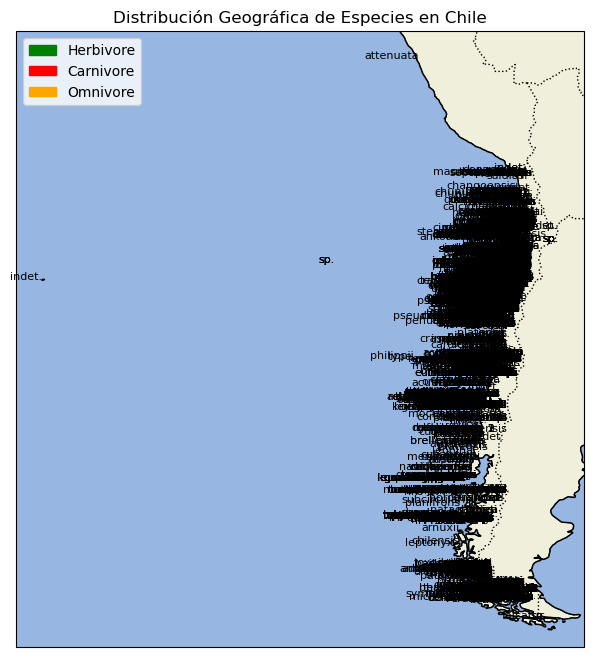

In [248]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa para Chile
#ax.set_extent([-75, -66, -56, -17], crs=ccrs.PlateCarree())  # Límites de Chile

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir un diccionario de colores por dieta
color_dict = {
    'Herbivore': 'green',
    'Carnivore': 'red',
    'Omnivore': 'orange'
}

# Mapear la dieta a colores
colors = df_chile_new['diet'].map(color_dict)

# Graficar los puntos, usando colores y tamaños según la dieta y la cantidad de ocurrencias
scatter = ax.scatter(
    df_chile_new['lng'], df_chile_new['lat'],
    c=colors,  # Usar 'c' para una secuencia de colores
    alpha=0.6,
    s=df_chile_new['occurrence_no'] * 2,  # Ajusta el factor de escala según sea necesario
    transform=ccrs.PlateCarree()
)

# Agregar etiquetas a los puntos (opcional)
for i in range(len(df_chile_new)):
    ax.text(
        df_chile_new['lng'][i],
        df_chile_new['lat'][i],
        df_chile_new['species_name'][i],
        fontsize=8,
        ha='right',
        transform=ccrs.PlateCarree()
    )

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar leyenda
legend_elements = [
    mpatches.Patch(color='green', label='Herbivore'),
    mpatches.Patch(color='red', label='Carnivore'),
    mpatches.Patch(color='orange', label='Omnivore')
]
plt.legend(handles=legend_elements, loc='upper left')

# Mostrar el gráfico
plt.show()

In [249]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa para Chile
#ax.set_extent([-75, -66, -56, -17], crs=ccrs.PlateCarree())  # Límites de Chile

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir un diccionario de colores por dieta
color_dict = {
    'Herbivore': 'green',
    'Carnivore': 'red',
    'Omnivore': 'orange'
}

# Mapear la dieta a colores
colors = df_chile_new['diet'].map(color_dict)

# Asegúrate de que el tamaño de los puntos sea visible
sizes = df_chile_new['occurrence_no'].clip(lower=1) * 10  # Ajusta el factor de escala según sea necesario

# Graficar los puntos, usando colores y tamaños según la dieta y la cantidad de ocurrencias
scatter = ax.scatter(
    df_chile_new['lng'], df_chile_new['lat'],
    c=colors,  # Usar 'c' para una secuencia de colores
    alpha=0.6,
    s=sizes,  # Tamaño ajustado
    transform=ccrs.PlateCarree()
)

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar leyenda
legend_elements = [
    mpatches.Patch(color='green', label='Herbivore'),
    mpatches.Patch(color='red', label='Carnivore'),
    mpatches.Patch(color='orange', label='Omnivore')
]
plt.legend(handles=legend_elements, loc='upper left')

# Mostrar el gráfico
plt.show()

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\2836457756.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5


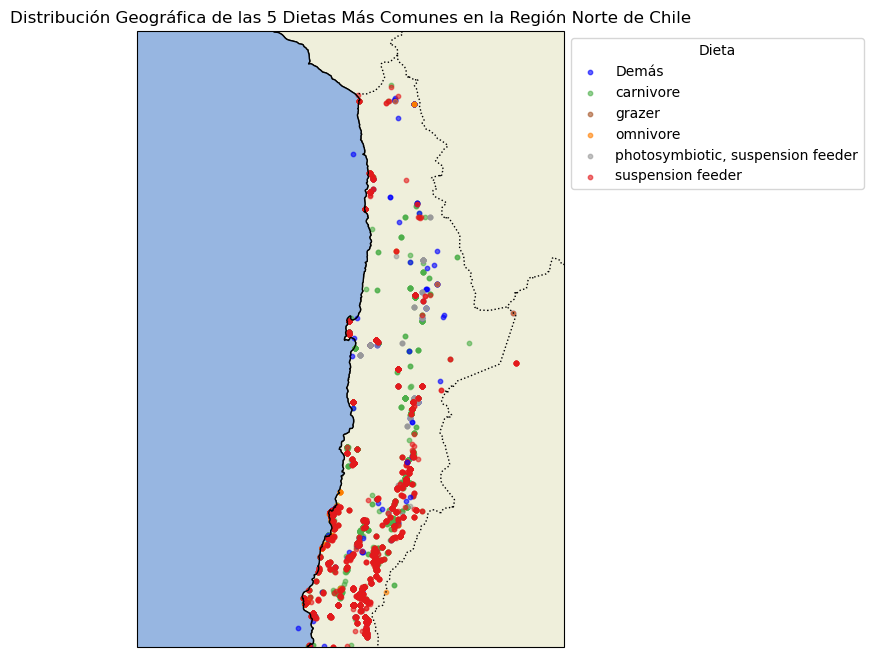

In [250]:
region = 'Norte'  # Cambia esto a 'Centro' o 'Sur' según desees

if region == 'Norte':
    filtered_df = df_chile_new[(df_chile_new['lat'] >= -30) & (df_chile_new['lat'] <= -17)]
    extent = [-75, -66, -17, -30]  # Límites para el norte
elif region == 'Centro':
    filtered_df = df_chile_new[(df_chile_new['lat'] >= -40) & (df_chile_new['lat'] < -30)]
    extent = [-75, -66, -30, -40]  # Límites para el centro
elif region == 'Sur':
    filtered_df = df_chile_new[(df_chile_new['lat'] < -40) & (df_chile_new['lat'] >= -56)]
    extent = [-75, -66, -40, -56]  # Límites para el sur

diet_counts = filtered_df['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa según la región
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las dietas
colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5
color_dict = {dieta: colores(i) for i, dieta in enumerate(top_5_diets.index[:-1])}  # Excluye 'Demás'
color_dict['Demás'] = 'green'  # Color verde para la categoría "Demás"

# Graficar los puntos con colores según la dieta
for dieta, grupo in filtered_df.groupby('diet'):
    if dieta in top_5_diets.index:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label=dieta)
    else:  # Para las dietas no comunes
        ax.scatter(grupo['lng'], grupo['lat'], color='blue', alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label='Demás' if 'Demás' not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title(f'Distribución Geográfica de las 5 Dietas Más Comunes en la Región {region} de Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

In [251]:
region = 'Centro'  # Cambia esto a 'Centro' o 'Sur' según desees

if region == 'Norte':
    filtered_df = df_chile_new[(df_chile_new['lat'] >= -30) & (df_chile_new['lat'] <= -17)]
    extent = [-75, -66, -17, -30]  # Límites para el norte
elif region == 'Centro':
    filtered_df = df_chile_new[(df_chile_new['lat'] >= -40) & (df_chile_new['lat'] < -30)]
    extent = [-75, -66, -30, -40]  # Límites para el centro
elif region == 'Sur':
    filtered_df = df_chile_new[(df_chile_new['lat'] < -40) & (df_chile_new['lat'] >= -56)]
    extent = [-75, -66, -40, -56]  # Límites para el sur

diet_counts = filtered_df['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa según la región
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las dietas
colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5
color_dict = {dieta: colores(i) for i, dieta in enumerate(top_5_diets.index[:-1])}  # Excluye 'Demás'
color_dict['Demás'] = 'green'  # Color verde para la categoría "Demás"

# Graficar los puntos con colores según la dieta
for dieta, grupo in filtered_df.groupby('diet'):
    if dieta in top_5_diets.index:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label=dieta)
    else:  # Para las dietas no comunes
        ax.scatter(grupo['lng'], grupo['lat'], color='blue', alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label='Demás' if 'Demás' not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title(f'Distribución Geográfica de las 5 Dietas Más Comunes en la Región {region} de Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\2167105281.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5


C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\3386936171.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5


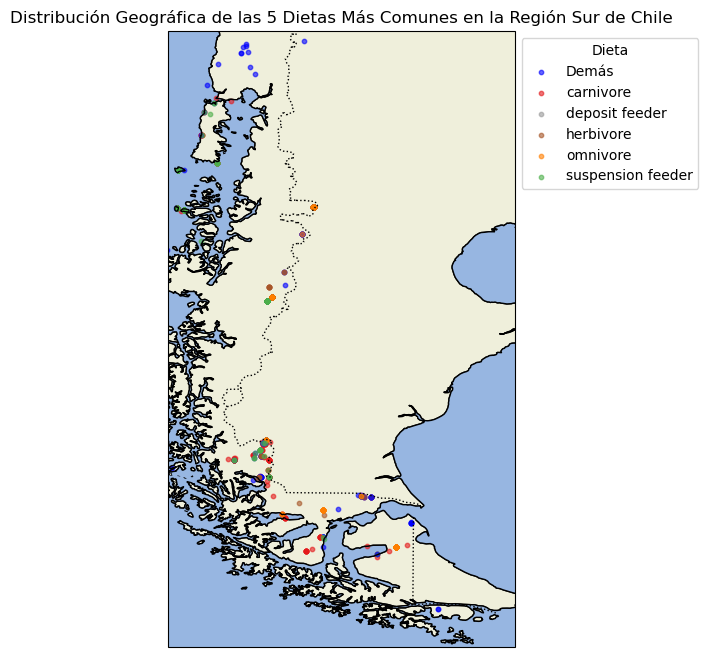

In [252]:
region = 'Sur'  # Cambia esto a 'Centro' o 'Sur' según desees

if region == 'Norte':
    filtered_df = df_chile_new[(df_chile_new['lat'] >= -30) & (df_chile_new['lat'] <= -17)]
    extent = [-75, -66, -17, -30]  # Límites para el norte
elif region == 'Centro':
    filtered_df = df_chile_new[(df_chile_new['lat'] >= -40) & (df_chile_new['lat'] < -30)]
    extent = [-75, -66, -30, -40]  # Límites para el centro
elif region == 'Sur':
    filtered_df = df_chile_new[(df_chile_new['lat'] < -40) & (df_chile_new['lat'] >= -56)]
    extent = [-75, -66, -40, -56]  # Límites para el sur

diet_counts = filtered_df['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Crear un mapa del mundo
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa según la región
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Definir una paleta de colores para las dietas
colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5
color_dict = {dieta: colores(i) for i, dieta in enumerate(top_5_diets.index[:-1])}  # Excluye 'Demás'
color_dict['Demás'] = 'green'  # Color verde para la categoría "Demás"

# Graficar los puntos con colores según la dieta
for dieta, grupo in filtered_df.groupby('diet'):
    if dieta in top_5_diets.index:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label=dieta)
    else:  # Para las dietas no comunes
        ax.scatter(grupo['lng'], grupo['lat'], color='blue', alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label='Demás' if 'Demás' not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title(f'Distribución Geográfica de las 5 Dietas Más Comunes en la Región {region} de Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

C:\Users\vicen\AppData\Local\Temp\ipykernel_7712\1140730908.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5


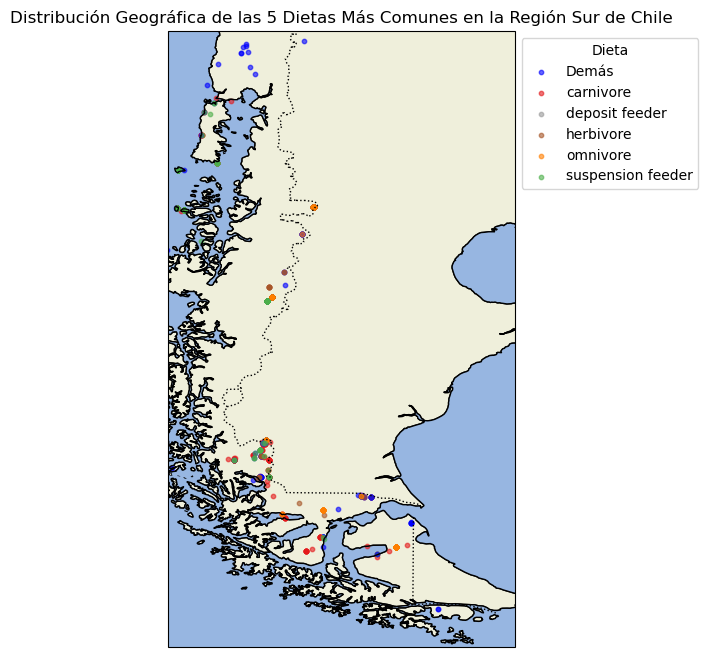

In [253]:
# Cargar los límites de las regiones de Chile
# Asegúrate de tener un shapefile de las regiones de Chile
# Puedes descargar un shapefile de las regiones de Chile desde fuentes de datos geográficos
# Por ejemplo, usando geopandas:
# regions = gpd.read_file('path_to_chile_regions_shapefile.shp')

# Aquí solo para este ejemplo, se asume que ya tienes un GeoDataFrame "regions"
# regions = gpd.read_file('path_to_your_chile_regions_shapefile.shp')

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer los límites del mapa según la región
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Dibujar costas y países
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Agregar los límites de las regiones
# regions.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)  # Ajusta el color y grosor

# Contar la frecuencia de cada tipo de dieta en la región filtrada
diet_counts = filtered_df['diet'].value_counts()

# Seleccionar los 5 tipos de dieta más comunes
top_5_diets = diet_counts.head(5)

# Sumar las dietas restantes en una categoría "Demás"
other_diets_count = diet_counts[5:].sum()
top_5_diets['Demás'] = other_diets_count

# Definir una paleta de colores para las dietas
colores = plt.cm.get_cmap('Set1', len(top_5_diets) - 1)  # Paleta para las top 5
color_dict = {dieta: colores(i) for i, dieta in enumerate(top_5_diets.index[:-1])}  # Excluye 'Demás'
color_dict['Demás'] = 'green'  # Color verde para la categoría "Demás"

# Graficar los puntos con colores según la dieta
for dieta, grupo in filtered_df.groupby('diet'):
    if dieta in top_5_diets.index:
        ax.scatter(grupo['lng'], grupo['lat'], color=color_dict[dieta], alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label=dieta)
    else:  # Para las dietas no comunes
        ax.scatter(grupo['lng'], grupo['lat'], color='blue', alpha=0.6, 
                   s=10, transform=ccrs.PlateCarree(), label='Demás' if 'Demás' not in ax.get_legend_handles_labels()[1] else "")

# Títulos y etiquetas
plt.title(f'Distribución Geográfica de las 5 Dietas Más Comunes en la Región {region} de Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadir leyenda
plt.legend(title='Dieta', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

In [255]:
# 1. Eliminar filas con valores nulos
df_chile_new = df_chile_new.dropna()

# 2. Eliminar duplicados
df_chile_new = df_chile_new.drop_duplicates()

# 3. Convertir tipos de datos
# Por ejemplo, convertir 'lat' y 'lng' a float
df_chile_new['lat'] = df_chile_new['lat'].astype(float)
df_chile_new['lng'] = df_chile_new['lng'].astype(float)

# 4. Filtrar datos no deseados
# Suponiendo que quieres eliminar registros con dietas no especificadas
df_chile_new = df_chile_new[df_chile_new['diet'].notnull()]

# 5. Normalizar o estandarizar valores
# Por ejemplo, asegurarse de que las dietas estén en un formato consistente
df_chile_new['diet'] = df_chile_new['diet'].str.strip().str.lower()

# Mostrar información y algunos registros del DataFrame limpio
print(df_chile_new.info())
print(df_chile_new.head())

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 25 to 9461
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_name    431 non-null    object 
 1   occurrence_no   431 non-null    int64  
 2   accepted_name   431 non-null    object 
 3   accepted_rank   431 non-null    object 
 4   early_interval  431 non-null    object 
 5   late_interval   431 non-null    object 
 6   max_ma          431 non-null    float64
 7   min_ma          431 non-null    float64
 8   phylum          431 non-null    object 
 9   class           431 non-null    object 
 10  order           431 non-null    object 
 11  family          431 non-null    object 
 12  genus           431 non-null    object 
 13  lat             431 non-null    float64
 14  lng             431 non-null    float64
 15  diet            431 non-null    object 
 16  geogscale       431 non-null    object 
 17  life_habit      431 non-null    object

In [9]:
df_chile_new.describe

<bound method NDFrame.describe of      species_name  occurrence_no            accepted_name accepted_rank  \
0       ceciliana          16417               Leionucula         genus   
1      amuriensis          16418                 Nuculana         genus   
2     cuneiformis          16419                 Nuculana         genus   
3     levitestata          16420                   Yoldia         genus   
4         pencana          16421                Neiloides         genus   
...           ...            ...                      ...           ...   
9476          sp.        1659402                   Ostrea         genus   
9477   antarctica        1659403     Cucullaea antarctica       species   
9478          sp.        1659404                   Nucula         genus   
9479   saladensis        1660104  Micrauchenia saladensis       species   
9480       indet.        1662256             Tracheophyta   superphylum   

           early_interval late_interval  max_ma  min_ma        ph

In [10]:
df_chile_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_name    9481 non-null   object 
 1   occurrence_no   9481 non-null   int64  
 2   accepted_name   9481 non-null   object 
 3   accepted_rank   9343 non-null   object 
 4   early_interval  9481 non-null   object 
 5   late_interval   1605 non-null   object 
 6   max_ma          9481 non-null   float64
 7   min_ma          9481 non-null   float64
 8   phylum          9337 non-null   object 
 9   class           9292 non-null   object 
 10  order           9123 non-null   object 
 11  family          8914 non-null   object 
 12  genus           8574 non-null   object 
 13  lat             9481 non-null   float64
 14  lng             9481 non-null   float64
 15  diet            8749 non-null   object 
 16  geogscale       6426 non-null   object 
 17  life_habit      8743 non-null   o

In [260]:
jurassic_intervals = [
    'Jurásico Inferior', 'Jurásico Medio', 'Jurásico Superior',
    'Bajociano', 'Batoniano', 'Calloviano', 'Oxfordiano', 'Kimmeridgiano', 'Titoniano','Barremian'
]

# Filtrar el DataFrame para incluir solo los intervalos jurásicos
jurassic_df = df_chile_new[
    (df_chile_new['early_interval'].isin(jurassic_intervals)) | 
    (df_chile_new['late_interval'].isin(jurassic_intervals))
]

# Mostrar información del DataFrame filtrado
print(jurassic_df.info())
print(jurassic_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2461 to 5037
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_name    10 non-null     object 
 1   occurrence_no   10 non-null     int64  
 2   accepted_name   10 non-null     object 
 3   accepted_rank   10 non-null     object 
 4   early_interval  10 non-null     object 
 5   late_interval   10 non-null     object 
 6   max_ma          10 non-null     float64
 7   min_ma          10 non-null     float64
 8   phylum          10 non-null     object 
 9   class           10 non-null     object 
 10  order           10 non-null     object 
 11  family          10 non-null     object 
 12  genus           10 non-null     object 
 13  lat             10 non-null     float64
 14  lng             10 non-null     float64
 15  diet            10 non-null     object 
 16  geogscale       10 non-null     object 
 17  life_habit      10 non-null     objec

In [261]:
jurassic_df.head()

species_name  occurrence_no                  accepted_name  \
2461           retifera         365677         Stelidioseris retifera   
2462                sp.         365678                     Astreopora   
2463  ankotrofotsyensis         365679  Thamnoseris ankotrofotsyensis   
2464                sp.         365680                  Ellipsocoenia   
2465            arnaudi         365681            Thamnoseris arnaudi   

     accepted_rank early_interval late_interval  max_ma  min_ma    phylum  \
2461       species    Hauterivian     Barremian   132.6   121.4  Cnidaria   
2462         genus    Hauterivian     Barremian   132.6   121.4  Cnidaria   
2463       species    Hauterivian     Barremian   132.6   121.4  Cnidaria   
2464         genus    Hauterivian     Barremian   132.6   121.4  Cnidaria   
2465       species    Hauterivian     Barremian   132.6   121.4  Cnidaria   

         class         order          family          genus        lat  \
2461  Anthozoa  Scleractinia  Actinastreidae  Stelidioseris -23.833332   
2462  Anthozoa  Scleractinia     Acroporidae     Astreopora -23.833332   
2463  Anthozoa  Scleractinia  Latomeandridae    Thamnoseris -23.833332   
2464  Anthozoa  Scleractinia  Latomeandridae  Ellipsocoenia -23.833332   
2465  Anthozoa  Scleractinia  Latomeandridae    Thamnoseris -23.833332   

            lng                               diet geogscale        life_habit  
2461 -70.300003  photosymbiotic, suspension feeder   outcrop  colonial, clonal  
2462 -70.300003  photosymbiotic, suspension feeder   outcrop  colonial, clonal  
2463 -70.300003  photosymbiotic, suspension feeder   outcrop  colonial, clonal  
2464 -70.300003  photosymbiotic, suspension feeder   outcrop  colonial, clonal  
2465 -70.300003  photosymbiotic, suspension feeder   outcrop  colonial, clonal

In [11]:
# Obtener los nombres únicos de early_interval
early_unique = df_chile_new['early_interval'].unique()

# Obtener los nombres únicos de late_interval
late_unique = df_chile_new['late_interval'].unique()

# Mostrar los resultados
print("Nombres únicos de early_interval:")
print(early_unique)

print("\nNombres únicos de late_interval:")
print(late_unique)

Nombres únicos de early_interval:
['Maastrichtian' 'Emsian' 'Sinemurian' 'Pliensbachian' 'Toarcian' 'Arenig'
 'Early Llanvirn' 'Late Maastrichtian' 'Middle Jurassic' 'Tithonian'
 'Middle Triassic' 'Norian' 'Late Triassic' 'Late Sinemurian'
 'Early Miocene' 'Early Pliensbachian' 'Late Pliensbachian'
 'Late Toarcian' 'Early Toarcian' 'Middle Toarcian' 'Early Bajocian'
 'Hauterivian' 'Tournaisian' 'Jurassic' 'Campanian' 'Aalenian'
 'Early Oligocene' 'Casamayoran' 'Kungurian' 'Late Miocene' 'Burdigalian'
 'Santonian' 'Kimmeridgian' 'Messinian' 'Zanclean' 'Berriasian'
 'Valanginian' 'Late Hettangian' 'Early Sinemurian' 'Planorbis'
 'Late Callovian' 'Callovian' 'Hettangian' 'Bajocian' 'Late Bajocian'
 'Late Bathonian' 'Early Callovian' 'Oxfordian' 'Late Cretaceous'
 'Late Pleistocene' 'Middle Eocene' 'Early Valanginian' 'Late Valanginian'
 'Late Hauterivian' 'Early Barremian' 'Late Barremian' 'Late Aptian'
 'Serravallian' 'Tortonian' 'Gelasian' 'Calabrian' 'Early Pliocene'
 'Pliocene' 'Middl

In [12]:
cambrian_intervals = [
    'Terreneuvian', 'Series 2', 'Miaolingian', 'Furongian', 
    'Fortunian', 'Stage 2', 'Stage 3', 'Stage 4', 
    'Wuliuan', 'Drumian', 'Guzhangian', 'Paibian', 
    'Jiangshanian', 'Stage 10'
]


In [13]:
df_chile_new


species_name  occurrence_no            accepted_name accepted_rank  \
0       ceciliana          16417               Leionucula         genus   
1      amuriensis          16418                 Nuculana         genus   
2     cuneiformis          16419                 Nuculana         genus   
3     levitestata          16420                   Yoldia         genus   
4         pencana          16421                Neiloides         genus   
...           ...            ...                      ...           ...   
9476          sp.        1659402                   Ostrea         genus   
9477   antarctica        1659403     Cucullaea antarctica       species   
9478          sp.        1659404                   Nucula         genus   
9479   saladensis        1660104  Micrauchenia saladensis       species   
9480       indet.        1662256             Tracheophyta   superphylum   

           early_interval late_interval  max_ma  min_ma        phylum  \
0           Maastrichtian           NaN   72.10  66.000      Mollusca   
1           Maastrichtian           NaN   72.10  66.000      Mollusca   
2           Maastrichtian           NaN   72.10  66.000      Mollusca   
3           Maastrichtian           NaN   72.10  66.000      Mollusca   
4           Maastrichtian           NaN   72.10  66.000      Mollusca   
...                   ...           ...     ...     ...           ...   
9476             Turonian     Campanian   93.90  72.100      Mollusca   
9477             Turonian     Campanian   93.90  72.100      Mollusca   
9478             Turonian     Campanian   93.90  72.100      Mollusca   
9479            Tortonian     Messinian   11.63   5.333      Chordata   
9480  Early Maastrichtian           NaN   72.10  66.000  Tracheophyta   

         class             order               family         genus  \
0     Bivalvia          Nuculida            Nuculidae    Leionucula   
1     Bivalvia        Nuculanida          Nuculanidae      Nuculana   
2     Bivalvia        Nuculanida          Nuculanidae      Nuculana   
3     Bivalvia        Nuculanida            Yoldiidae        Yoldia   
4     Bivalvia          Nuculida  NO_FAMILY_SPECIFIED     Neiloides   
...        ...               ...                  ...           ...   
9476  Bivalvia          Ostreida            Ostreidae        Ostrea   
9477  Bivalvia            Arcida         Cucullaeidae     Cucullaea   
9478  Bivalvia          Nuculida            Nuculidae        Nucula   
9479  Mammalia  Panameriungulata      Macraucheniidae  Micrauchenia   
9480       NaN               NaN                  NaN           NaN   

            lat        lng                               diet geogscale  \
0    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
1    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
2    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
3    -37.000000 -73.000000                     deposit feeder     basin   
4    -37.000000 -73.000000                     deposit feeder     basin   
...         ...        ...                                ...       ...   
9476 -50.884998 -72.625000                  suspension feeder       NaN   
9477 -50.884998 -72.625000                  suspension feeder       NaN   
9478 -50.884998 -72.625000  deposit feeder, suspension feeder       NaN   
9479 -27.684723 -70.949997                          herbivore       NaN   
9480 -50.711666 -72.541389                                NaN   outcrop   

      life_habit  
0       infaunal  
1       infaunal  
2       infaunal  
3       infaunal  
4       infaunal  
...          ...  
9476   epifaunal  
9477    infaunal  
9478    infaunal  
9479  scansorial  
9480         NaN  

[9481 rows x 18 columns]

In [14]:
df_chile_new['Categoria'] = None  # O puedes usar df_chile_new['c'] = 0 para inicializar con ceros

# Mostrar información del DataFrame actualizado
print(df_chile_new.head())

  species_name  occurrence_no accepted_name accepted_rank early_interval  \
0    ceciliana          16417    Leionucula         genus  Maastrichtian   
1   amuriensis          16418      Nuculana         genus  Maastrichtian   
2  cuneiformis          16419      Nuculana         genus  Maastrichtian   
3  levitestata          16420        Yoldia         genus  Maastrichtian   
4      pencana          16421     Neiloides         genus  Maastrichtian   

  late_interval  max_ma  min_ma    phylum     class       order  \
0           NaN    72.1    66.0  Mollusca  Bivalvia    Nuculida   
1           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculanida   
2           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculanida   
3           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculanida   
4           NaN    72.1    66.0  Mollusca  Bivalvia    Nuculida   

                family       genus   lat   lng  \
0            Nuculidae  Leionucula -37.0 -73.0   
1          Nuculanidae    Nuculana -37.0

In [15]:
df_chile_new.head()

species_name  occurrence_no accepted_name accepted_rank early_interval  \
0    ceciliana          16417    Leionucula         genus  Maastrichtian   
1   amuriensis          16418      Nuculana         genus  Maastrichtian   
2  cuneiformis          16419      Nuculana         genus  Maastrichtian   
3  levitestata          16420        Yoldia         genus  Maastrichtian   
4      pencana          16421     Neiloides         genus  Maastrichtian   

  late_interval  max_ma  min_ma    phylum     class       order  \
0           NaN    72.1    66.0  Mollusca  Bivalvia    Nuculida   
1           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculanida   
2           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculanida   
3           NaN    72.1    66.0  Mollusca  Bivalvia  Nuculanida   
4           NaN    72.1    66.0  Mollusca  Bivalvia    Nuculida   

                family       genus   lat   lng  \
0            Nuculidae  Leionucula -37.0 -73.0   
1          Nuculanidae    Nuculana -37.0 -73.0   
2          Nuculanidae    Nuculana -37.0 -73.0   
3            Yoldiidae      Yoldia -37.0 -73.0   
4  NO_FAMILY_SPECIFIED   Neiloides -37.0 -73.0   

                                diet geogscale life_habit Categoria  
0  deposit feeder, suspension feeder     basin   infaunal      None  
1  deposit feeder, suspension feeder     basin   infaunal      None  
2  deposit feeder, suspension feeder     basin   infaunal      None  
3                     deposit feeder     basin   infaunal      None  
4                     deposit feeder     basin   infaunal      None

In [16]:
# Filtrar registros que pertenecen a la categoría "Cámbrico"
cambrian_df = df_chile_new.query("categoria == 'Cámbrico'")

# Mostrar información del DataFrame filtrado
print(cambrian_df.info())
print(cambrian_df.head())

UndefinedVariableError: name 'categoria' is not defined

In [17]:
cambrian_df.head()

NameError: name 'cambrian_df' is not defined

In [18]:
# Definir los intervalos a agrupar bajo "Cámbrico"
cambrian_intervals = [
    'Terreneuvian', 'Series 2', 'Miaolingian', 'Furongian', 
    'Fortunian', 'Stage 2', 'Stage 3', 'Stage 4', 
    'Wuliuan', 'Drumian', 'Guzhangian', 'Paibian', 
    'Jiangshanian', 'Stage 10'
]

# Crear la nueva columna "c" y asignar "Cámbrico" donde corresponda
df_chile_new['Categoria'] = df_chile_new['early_interval'].apply(
    lambda x: 'Cámbrico' if x in cambrian_intervals else None
)

# También verificar en late_interval
df_chile_new['Categoria'] = df_chile_new['c'].combine_first(
    df_chile_new['late_interval'].apply(
        lambda x: 'Cámbrico' if x in cambrian_intervals else None
    )
)

# Mostrar información del DataFrame actualizado
print(df_chile_new[['early_interval', 'late_interval', 'c']].head())

KeyError: 'c'

In [19]:
# Lista de intervalos que quieres categorizar como Cambrian
cambrian_intervals = [
    'Terreneuvian', 'Series 2', 'Miaoligian', 'Furongian', 'Fortunian',
    'Stage 2', 'Stage 3', 'Stage 4', 'Wuliuan', 'Drumian', 'Guzhangian',
    'Paibian', 'Jiangshanian', 'Stage 10'
]

# Crear una nueva columna 'category' en el DataFrame y asignar 'Cambrian' si el intervalo pertenece a Cambrian
df_chile_new['category'] = df_chile_new['early_interval'].apply(
    lambda x: 'Cambrian' if x in cambrian_intervals else 'Other'
)

# Ver el DataFrame resultante
print(df_chile_new)

     species_name  occurrence_no            accepted_name accepted_rank  \
0       ceciliana          16417               Leionucula         genus   
1      amuriensis          16418                 Nuculana         genus   
2     cuneiformis          16419                 Nuculana         genus   
3     levitestata          16420                   Yoldia         genus   
4         pencana          16421                Neiloides         genus   
...           ...            ...                      ...           ...   
9476          sp.        1659402                   Ostrea         genus   
9477   antarctica        1659403     Cucullaea antarctica       species   
9478          sp.        1659404                   Nucula         genus   
9479   saladensis        1660104  Micrauchenia saladensis       species   
9480       indet.        1662256             Tracheophyta   superphylum   

           early_interval late_interval  max_ma  min_ma        phylum  \
0           Maastrichtian 

In [20]:
cambrian_intervals = [
    'Terreneuvian', 'Series 2', 'Miaolingian', 'Furongian', 
    'Fortunian', 'Stage 2', 'Stage 3', 'Stage 4', 
    'Wuliuan', 'Drumian', 'Guzhangian', 'Paibian', 
    'Jiangshanian', 'Stage 10'
]

# Crear la nueva columna "Categoria" con "Cámbrico" donde corresponda en early_interval
df_chile_new['Categoria'] = df_chile_new['early_interval'].apply(
    lambda x: 'Cámbrico' if x in cambrian_intervals else None
)

# Asignar "Cámbrico" también a la columna "Categoria" en late_interval si corresponde
df_chile_new['Categoria'] = df_chile_new['Categoria'].combine_first(
    df_chile_new['late_interval'].apply(
        lambda x: 'Cámbrico' if x in cambrian_intervals else None
    )
)

# Mostrar información del DataFrame actualizado
print(df_chile_new[['early_interval', 'late_interval', 'Categoria']].head())

  early_interval late_interval Categoria
0  Maastrichtian           NaN      None
1  Maastrichtian           NaN      None
2  Maastrichtian           NaN      None
3  Maastrichtian           NaN      None
4  Maastrichtian           NaN      None


In [21]:
df_chile_new

species_name  occurrence_no            accepted_name accepted_rank  \
0       ceciliana          16417               Leionucula         genus   
1      amuriensis          16418                 Nuculana         genus   
2     cuneiformis          16419                 Nuculana         genus   
3     levitestata          16420                   Yoldia         genus   
4         pencana          16421                Neiloides         genus   
...           ...            ...                      ...           ...   
9476          sp.        1659402                   Ostrea         genus   
9477   antarctica        1659403     Cucullaea antarctica       species   
9478          sp.        1659404                   Nucula         genus   
9479   saladensis        1660104  Micrauchenia saladensis       species   
9480       indet.        1662256             Tracheophyta   superphylum   

           early_interval late_interval  max_ma  min_ma        phylum  \
0           Maastrichtian           NaN   72.10  66.000      Mollusca   
1           Maastrichtian           NaN   72.10  66.000      Mollusca   
2           Maastrichtian           NaN   72.10  66.000      Mollusca   
3           Maastrichtian           NaN   72.10  66.000      Mollusca   
4           Maastrichtian           NaN   72.10  66.000      Mollusca   
...                   ...           ...     ...     ...           ...   
9476             Turonian     Campanian   93.90  72.100      Mollusca   
9477             Turonian     Campanian   93.90  72.100      Mollusca   
9478             Turonian     Campanian   93.90  72.100      Mollusca   
9479            Tortonian     Messinian   11.63   5.333      Chordata   
9480  Early Maastrichtian           NaN   72.10  66.000  Tracheophyta   

         class             order               family         genus  \
0     Bivalvia          Nuculida            Nuculidae    Leionucula   
1     Bivalvia        Nuculanida          Nuculanidae      Nuculana   
2     Bivalvia        Nuculanida          Nuculanidae      Nuculana   
3     Bivalvia        Nuculanida            Yoldiidae        Yoldia   
4     Bivalvia          Nuculida  NO_FAMILY_SPECIFIED     Neiloides   
...        ...               ...                  ...           ...   
9476  Bivalvia          Ostreida            Ostreidae        Ostrea   
9477  Bivalvia            Arcida         Cucullaeidae     Cucullaea   
9478  Bivalvia          Nuculida            Nuculidae        Nucula   
9479  Mammalia  Panameriungulata      Macraucheniidae  Micrauchenia   
9480       NaN               NaN                  NaN           NaN   

            lat        lng                               diet geogscale  \
0    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
1    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
2    -37.000000 -73.000000  deposit feeder, suspension feeder     basin   
3    -37.000000 -73.000000                     deposit feeder     basin   
4    -37.000000 -73.000000                     deposit feeder     basin   
...         ...        ...                                ...       ...   
9476 -50.884998 -72.625000                  suspension feeder       NaN   
9477 -50.884998 -72.625000                  suspension feeder       NaN   
9478 -50.884998 -72.625000  deposit feeder, suspension feeder       NaN   
9479 -27.684723 -70.949997                          herbivore       NaN   
9480 -50.711666 -72.541389                                NaN   outcrop   

      life_habit Categoria category  
0       infaunal      None    Other  
1       infaunal      None    Other  
2       infaunal      None    Other  
3       infaunal      None    Other  
4       infaunal      None    Other  
...          ...       ...      ...  
9476   epifaunal      None    Other  
9477    infaunal      None    Other  
9478    infaunal      None    Other  
9479  scansorial      None    Other  
9480         NaN      None    Other  

[9481 rows x 20 

In [22]:
# Definimos los intervalos para cada categoría
silurian_intervals = [
    'Rhuddanian', 'Aeronian', 'Telychian', 'Sheinwoodian', 'Homerian', 
    'Gorstian', 'Ludfordian', 'Llandovery', 'Wenlock', 'Ludlow', 'Pridoli'
]

devonian_intervals = [
    'Lochkovian', 'Pragian', 'Emsian', 'Eifelian', 'Givetian', 
    'Fransnian', 'Famennian', 'Early Devonian', 'Middle Devonian', 'Late Devonian'
]

carboniferous_intervals = [
    'Tournaisian', 'Visean', 'Serpukhovian', 'Bashkirian', 'Moscovian', 
    'Kasimovian', 'Gzhelian', 'Mississippian', 'Pennsylvanian'
]

# Creamos una función para asignar la categoría correspondiente
def assign_category(interval):
    if interval in cambrian_intervals:
        return 'Cámbrico'
    elif interval in silurian_intervals:
        return 'Silúrico'
    elif interval in devonian_intervals:
        return 'Devónico'
    elif interval in carboniferous_intervals:
        return 'Carbonífero'
    else:
        return None

# Aplicamos la función tanto para 'early_interval' como para 'late_interval'
df_chile_new['Categoria'] = df_chile_new['early_interval'].apply(assign_category)

# Usamos 'combine_first' para llenar los valores nulos con los valores de 'late_interval'
df_chile_new['Categoria'] = df_chile_new['Categoria'].combine_first(
    df_chile_new['late_interval'].apply(assign_category)
)

# Mostrar la información actualizada del DataFrame
print(df_chile_new[['early_interval', 'late_interval', 'Categoria']].head())

  early_interval late_interval Categoria
0  Maastrichtian           NaN      None
1  Maastrichtian           NaN      None
2  Maastrichtian           NaN      None
3  Maastrichtian           NaN      None
4  Maastrichtian           NaN      None


In [24]:
# Filtrar el DataFrame para obtener solo las filas donde la columna 'Categoria' sea "Silúrico"
silurian_df = df_chile_new[df_chile_new['Categoria'] == 'Silúrico']

# Mostrar el resultado
print(silurian_df[['early_interval', 'late_interval', 'Categoria']].head())

Empty DataFrame
Columns: [early_interval, late_interval, Categoria]
Index: []


In [25]:
# Aplicamos la función solo para 'early_interval'
df_chile_new['Categoria'] = df_chile_new['early_interval'].apply(assign_category)

# Mostrar el resultado
print(df_chile_new[['early_interval', 'late_interval', 'Categoria']].head())

  early_interval late_interval Categoria
0  Maastrichtian           NaN      None
1  Maastrichtian           NaN      None
2  Maastrichtian           NaN      None
3  Maastrichtian           NaN      None
4  Maastrichtian           NaN      None
